In [48]:
import math
import random
import matplotlib.pyplot as plt

h = 1e-2
prec = 1e-7
iterMax = 10000
fact = 0.9

def f(x, params):
    return params[0] / (1 + params[1] * math.exp(-params[2] * x))

def error(xs, ys, params):
    return math.sqrt(sum((f(x, params) - y) ** 2 for x, y in zip(xs, ys)))

def inicials(xs, ys):    

    a0 = max(ys)
    pmax = 0
    xmed = 0

    for i in range(len(xs)  - 1):

        pend = (ys[i + 1] - ys[i]) / (xs[i + 1] - xs[i])
        if pend > pmax:
            pmax = pend
            xmed = (xs[i + 1] + xs[i]) / 2

    
    c0 = 4 * pmax / a0
    b0 = math.exp(c0 * xmed)

    return (a0, b0, c0)

def step(xs, ys, params0, verbose = True):
    global h
    
    disminueix = False
    paramsfinals = params0
    errorFinal = errorInicial = error(xs, ys, params0)

    if h < prec:
        return True, params0, errorInicial
    
    for c, val in enumerate(params0):
        for d in [-h, h]:
            
            params1 = params0[:c] + (val + d,) + params0[c + 1:]
            error1 = error(xs, ys, params1)
            
            if error1 < errorFinal:

                disminueix = True
                paramsFinals = params1
                errorFinal = error1

    if disminueix:
        h /= fact
        if verbose: print(f"{paramsFinals} Error: {errorFinal}")
        return False, paramsFinals, errorFinal

    else:
        h *= fact
        if(verbose): print(f"h = {h}")
        return False, params0, errorInicial
        

    


def findCurve(xs, ys, verbose = True):
    
    p = inicials(xs, ys)
    e = error(xs, ys, p)

    if verbose:
        print(f"Condicions inicials: {p}. Error: {e}")
    
    for i in range(iterMax):

        print(i)
        end, p, e = step(xs, ys, p, verbose = verbose)

        if(i % 10 == 0):
            plt.plot(xs, ys)
            plt.plot(xs, [f(x, p) for x in xs])
            plt.show()
        
        if end:

            plt.plot(xs, ys)
            plt.plot(xs, [f(x, p) for x in xs])
            plt.show()

            break
                
    return p, e

Condicions inicials: (5.824198, 2.6841969892088904, 0.6582544068728431). Error: 0.34271468737689614
0
(5.824198, 2.6841969892088904, 0.6682544068728431) Error: 0.29881934643176034


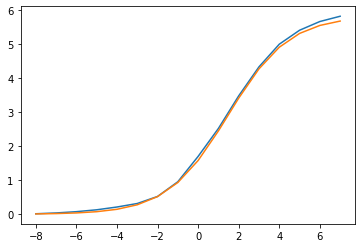

1
(5.824198, 2.6841969892088904, 0.6793655179839542) Error: 0.26217054332819245
2
(5.824198, 2.6841969892088904, 0.6917111969962999) Error: 0.2413276176322328
3
(5.837915421124828, 2.6841969892088904, 0.6917111969962999) Error: 0.2255421048613974
4
(5.853157000152415, 2.6841969892088904, 0.6917111969962999) Error: 0.21152154330416367
5
(5.870092087960845, 2.6841969892088904, 0.6917111969962999) Error: 0.20118837881782498
6
(5.888908852192435, 2.6841969892088904, 0.6917111969962999) Error: 0.19717821943483063
7
(5.888908852192435, 2.6841969892088904, 0.670803681183423) Error: 0.18355390066482086
8
(5.912139425317854, 2.6841969892088904, 0.670803681183423) Error: 0.1585786136392518
9
(5.9379511732349854, 2.6841969892088904, 0.670803681183423) Error: 0.14649464437617463
10
(5.9379511732349854, 2.655517269300966, 0.670803681183423) Error: 0.14245008600536307


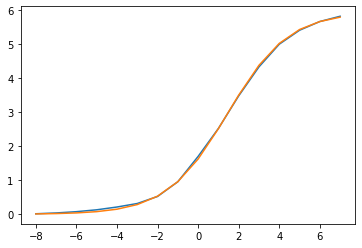

11
h = 0.028679719907924412
12
h = 0.02581174791713197
13
h = 0.023230573125418773
14
h = 0.020907515812876896
15
h = 0.018816764231589206
16
h = 0.016935087808430286
17
(5.9379511732349854, 2.655517269300966, 0.6538685933749927) Error: 0.13953717611703725
18
(5.956767937466575, 2.655517269300966, 0.6538685933749927) Error: 0.12137508355414475
19
(5.956767937466575, 2.634609753488089, 0.6538685933749927) Error: 0.11380527383175962
20
(5.956767937466575, 2.61137918036267, 0.6538685933749927) Error: 0.11088224555553572


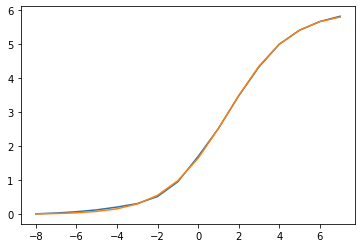

21
h = 0.023230573125418773
22
h = 0.020907515812876896
23
h = 0.018816764231589206
24
h = 0.016935087808430286
25
h = 0.015241579027587257
26
h = 0.013717421124828532
27
h = 0.012345679012345678
28
h = 0.011111111111111112
29
h = 0.01
30
h = 0.009000000000000001


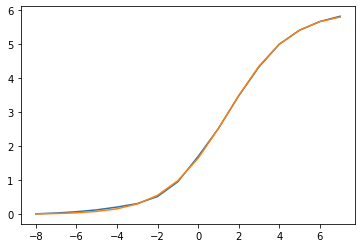

31
h = 0.008100000000000001
32
h = 0.007290000000000001
33
h = 0.006561000000000002
34
h = 0.005904900000000002
35
h = 0.005314410000000002
36
h = 0.004782969000000002
37
h = 0.004304672100000002
38
(5.961072609566575, 2.61137918036267, 0.6538685933749927) Error: 0.11087679057735532
39
(5.961072609566575, 2.61137918036267, 0.6490856243749927) Error: 0.10947486794857467
40
(5.966387019566575, 2.61137918036267, 0.6490856243749927) Error: 0.1076832079967376


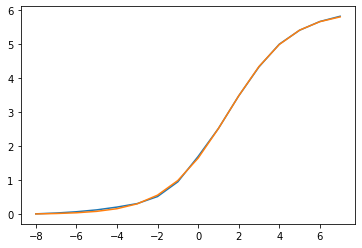

41
(5.972291919566575, 2.61137918036267, 0.6490856243749927) Error: 0.10707087125280106
42
h = 0.005904900000000003
43
h = 0.005314410000000003
44
h = 0.004782969000000002
45
h = 0.004304672100000002
46
h = 0.003874204890000002
47
(5.972291919566575, 2.61525338525267, 0.6490856243749927) Error: 0.10706078141660591
48
h = 0.003874204890000002
49
h = 0.003486784401000002
50
h = 0.003138105960900002


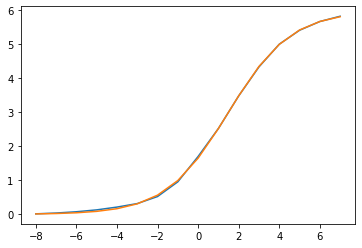

51
(5.972291919566575, 2.61211527929177, 0.6490856243749927) Error: 0.10705451061848438
52
h = 0.003138105960900002
53
h = 0.0028242953648100018
54
h = 0.0025418658283290017
55
(5.972291919566575, 2.614657145120099, 0.6490856243749927) Error: 0.10705012481066523
56
h = 0.0025418658283290017
57
h = 0.0022876792454961017
58
h = 0.0020589113209464917
59
(5.972291919566575, 2.6125982337991522, 0.6490856243749927) Error: 0.10704746065345934
60
h = 0.0020589113209464917


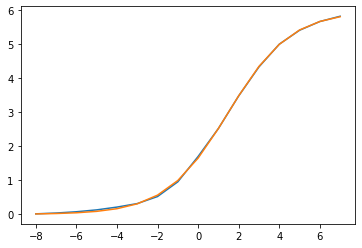

61
(5.972291919566575, 2.6125982337991522, 0.6470267130540462) Error: 0.10699153670797841
62
(5.974579598812071, 2.6125982337991522, 0.6470267130540462) Error: 0.10656375254903305
63
(5.9771214646404, 2.6125982337991522, 0.6470267130540462) Error: 0.1063482659268061
64
h = 0.0025418658283290017
65
h = 0.0022876792454961017
66
h = 0.0020589113209464917
67
h = 0.0018530201888518425
68
h = 0.0016677181699666583
69
(5.9771214646404, 2.6109305156291858, 0.6470267130540462) Error: 0.10634682728707912
70
h = 0.0016677181699666583


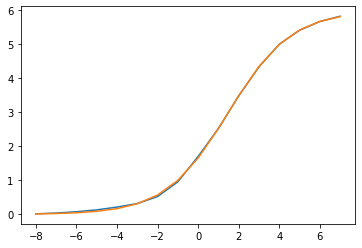

71
h = 0.0015009463529699924
72
(5.9771214646404, 2.6124314619821556, 0.6470267130540462) Error: 0.10634653692757455
73
h = 0.0015009463529699924
74
h = 0.0013508517176729932
75
(5.9771214646404, 2.611080610264483, 0.6470267130540462) Error: 0.10634551352930027
76
h = 0.0013508517176729932
77
h = 0.001215766545905694
78
(5.9771214646404, 2.6122963768103884, 0.6470267130540462) Error: 0.1063453945060499
79
h = 0.001215766545905694
80
h = 0.0010941898913151245


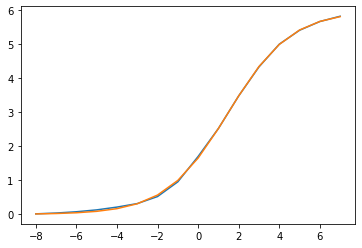

81
(5.9782156545317156, 2.6122963768103884, 0.6470267130540462) Error: 0.1063425770559865
82
(5.9782156545317156, 2.613512143356294, 0.6470267130540462) Error: 0.10633992016281506
83
h = 0.001215766545905694
84
h = 0.0010941898913151245
85
h = 0.0009847709021836122
86
h = 0.0008862938119652509
87
(5.9782156545317156, 2.613512143356294, 0.646140419242081) Error: 0.10633028178360755
88
(5.979200425433899, 2.613512143356294, 0.646140419242081) Error: 0.10625064818986374
89
(5.980294615325215, 2.613512143356294, 0.646140419242081) Error: 0.10621058742230675
90
(5.980294615325215, 2.6122963768103884, 0.646140419242081) Error: 0.10620095744625148


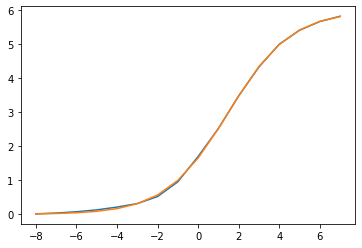

91
h = 0.001215766545905694
92
h = 0.0010941898913151245
93
h = 0.0009847709021836122
94
h = 0.0008862938119652509
95
h = 0.0007976644307687258
96
h = 0.0007178979876918532
97
h = 0.0006461081889226679
98
h = 0.0005814973700304011
99
h = 0.0005233476330273611
100
h = 0.000471012869724625


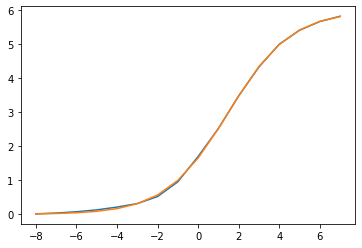

101
(5.980294615325215, 2.6122963768103884, 0.6456694063723564) Error: 0.10619775933410683
102
(5.980817962958242, 2.6122963768103884, 0.6456694063723564) Error: 0.10617806470830904
103
(5.981399460328272, 2.6122963768103884, 0.6456694063723564) Error: 0.10616987200896287
104
(5.981399460328272, 2.6116502686214655, 0.6456694063723564) Error: 0.10616890836787678
105
h = 0.000646108188922668
106
h = 0.0005814973700304012
107
h = 0.0005233476330273611
108
h = 0.000471012869724625
109
h = 0.0004239115827521625
110
h = 0.00038152042447694626


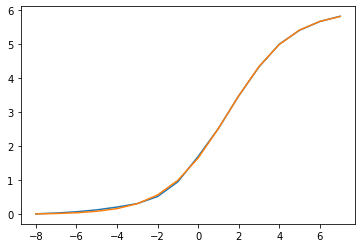

111
(5.981017939903795, 2.6116502686214655, 0.6456694063723564) Error: 0.10616870258073045
112
(5.981017939903795, 2.6112263570387135, 0.6456694063723564) Error: 0.10616836421786063
113
h = 0.0004239115827521625
114
h = 0.00038152042447694626
115
h = 0.00034336838202925164
116
h = 0.0003090315438263265
117
h = 0.00027812838944369386
118
(5.981017939903795, 2.6115044854281573, 0.6456694063723564) Error: 0.10616832790887863
119
h = 0.00027812838944369386
120
h = 0.0002503155504993245


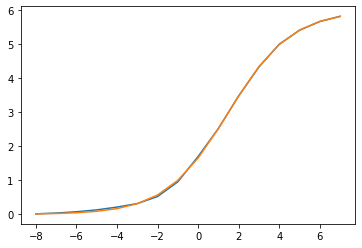

121
(5.981017939903795, 2.611254169877658, 0.6456694063723564) Error: 0.10616831622749322
122
h = 0.0002503155504993245
123
h = 0.00022528399544939206
124
(5.981017939903795, 2.611479453873107, 0.6456694063723564) Error: 0.10616829081304772
125
h = 0.00022528399544939206
126
(5.981243223899245, 2.611479453873107, 0.6456694063723564) Error: 0.10616827960089427
127
(5.981243223899245, 2.6117297694236066, 0.6456694063723564) Error: 0.10616810481528029
128
h = 0.0002503155504993245
129
h = 0.00022528399544939206
130
h = 0.00020275559590445286


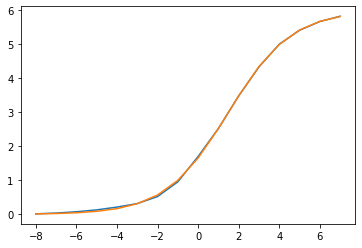

131
h = 0.00018248003631400757
132
h = 0.00016423203268260683
133
(5.981243223899245, 2.6117297694236066, 0.6455051743396738) Error: 0.1061678151497847
134
(5.981425703935559, 2.6117297694236066, 0.6455051743396738) Error: 0.10616515850403667
135
(5.981628459531464, 2.6117297694236066, 0.6455051743396738) Error: 0.10616387139737488
136
(5.981628459531464, 2.6115044854281573, 0.6455051743396738) Error: 0.1061635668352325
137
h = 0.00022528399544939208
138
h = 0.0002027555959044529
139
h = 0.0001824800363140076
140
h = 0.00016423203268260683


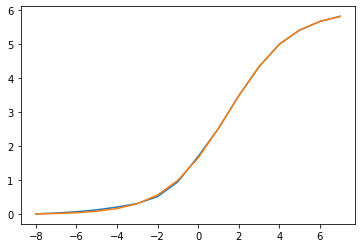

141
h = 0.00014780882941434616
142
h = 0.00013302794647291155
143
h = 0.00011972515182562039
144
h = 0.00010775263664305835
145
h = 9.697737297875251e-05
146
h = 8.727963568087727e-05
147
(5.981628459531464, 2.6115044854281573, 0.6454178947039929) Error: 0.10616348695626207
148
(5.981725436904443, 2.6115044854281573, 0.6454178947039929) Error: 0.10616285256888262
149
(5.981833189541086, 2.6115044854281573, 0.6454178947039929) Error: 0.10616261785687241
150
(5.981833189541086, 2.611384760276332, 0.6454178947039929) Error: 0.10616259885296846


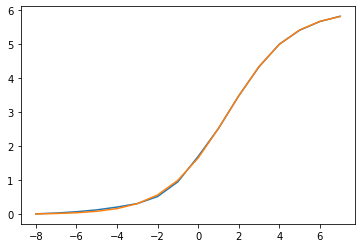

151
h = 0.00011972515182562036
152
h = 0.00010775263664305833
153
h = 9.69773729787525e-05
154
h = 8.727963568087726e-05
155
(5.981745909905405, 2.611384760276332, 0.6454178947039929) Error: 0.10616258310515816
156
(5.981745909905405, 2.611287782903353, 0.6454178947039929) Error: 0.10616256580142504
157
h = 9.69773729787525e-05
158
h = 8.727963568087726e-05
159
h = 7.855167211278954e-05
160
h = 7.069650490151059e-05


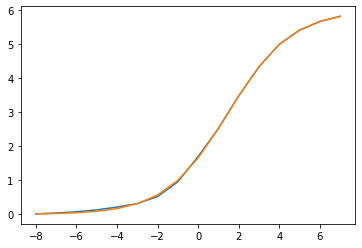

161
h = 6.362685441135954e-05
162
(5.981745909905405, 2.6113514097577646, 0.6454178947039929) Error: 0.10616256362389685
163
h = 6.362685441135954e-05
164
h = 5.726416897022359e-05
165
(5.981745909905405, 2.6112941455887944, 0.6454178947039929) Error: 0.10616256326034919
166
h = 5.726416897022359e-05
167
h = 5.153775207320123e-05
168
(5.981745909905405, 2.6113456833408675, 0.6454178947039929) Error: 0.10616256170569235
169
h = 5.153775207320123e-05
170
h = 4.6383976865881114e-05


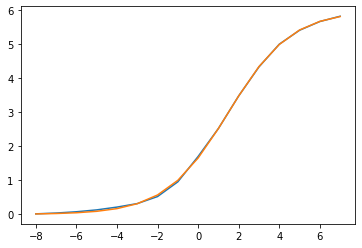

171
(5.981792293882271, 2.6113456833408675, 0.6454178947039929) Error: 0.10616255874940014
172
(5.981792293882271, 2.6113972210929406, 0.6454178947039929) Error: 0.10616255268322125
173
h = 5.153775207320123e-05
174
h = 4.6383976865881114e-05
175
h = 4.1745579179293e-05
176
h = 3.75710212613637e-05
177
h = 3.381391913522733e-05
178
h = 3.0432527221704597e-05
179
(5.981792293882271, 2.611366788565719, 0.6454178947039929) Error: 0.10616255216982064
180
h = 3.0432527221704597e-05


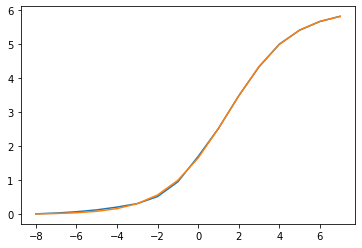

181
(5.981792293882271, 2.611366788565719, 0.6453874621767712) Error: 0.1061625468062314
182
(5.981826107801406, 2.611366788565719, 0.6453874621767712) Error: 0.10616247073216872
183
(5.981863678822667, 2.611366788565719, 0.6453874621767712) Error: 0.10616244336611576
184
h = 3.75710212613637e-05
185
h = 3.381391913522733e-05
186
h = 3.0432527221704597e-05
187
h = 2.7389274499534138e-05
188
h = 2.4650347049580723e-05
189
(5.981863678822667, 2.611342138218669, 0.6453874621767712) Error: 0.10616244295779366
190
h = 2.4650347049580723e-05


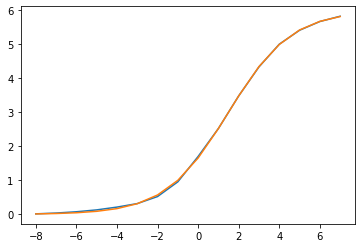

191
h = 2.218531234462265e-05
192
h = 1.9966781110160387e-05
193
(5.981843712041557, 2.611342138218669, 0.6453874621767712) Error: 0.10616244210637685
194
(5.981843712041557, 2.6113199529063245, 0.6453874621767712) Error: 0.10616244125179103
195
h = 2.218531234462265e-05
196
h = 1.9966781110160387e-05
197
h = 1.797010299914435e-05
198
h = 1.6173092699229914e-05
199
h = 1.4555783429306922e-05
200
(5.981843712041557, 2.6113345086897537, 0.6453874621767712) Error: 0.10616244110429676


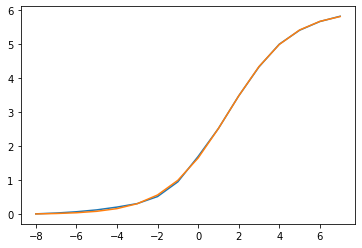

201
h = 1.4555783429306922e-05
202
h = 1.310020508637623e-05
203
h = 1.1790184577738607e-05
204
(5.981855502226135, 2.6113345086897537, 0.6453874621767712) Error: 0.10616244099688964
205
(5.981855502226135, 2.61134760889484, 0.6453874621767712) Error: 0.10616244069431427
206
h = 1.310020508637623e-05
207
h = 1.1790184577738607e-05
208
h = 1.0611166119964747e-05
209
h = 9.550049507968273e-06
210
h = 8.595044557171446e-06


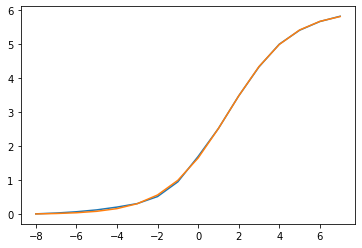

211
(5.981855502226135, 2.611339013850283, 0.6453874621767712) Error: 0.10616244064590419
212
h = 8.595044557171446e-06
213
(5.981855502226135, 2.611339013850283, 0.645378867132214) Error: 0.10616243987566969
214
(5.9818650522756425, 2.611339013850283, 0.645378867132214) Error: 0.10616243384838571
215
(5.9818756634417625, 2.611339013850283, 0.645378867132214) Error: 0.10616243171089211
216
h = 1.0611166119964747e-05
217
h = 9.550049507968273e-06
218
h = 8.595044557171446e-06
219
h = 7.735540101454301e-06
220
(5.9818756634417625, 2.611331278310182, 0.645378867132214) Error: 0.10616243170607335


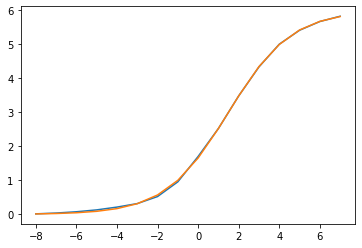

221
h = 7.735540101454301e-06
222
h = 6.9619860913088715e-06
223
(5.9818756634417625, 2.611338240296273, 0.645378867132214) Error: 0.10616243167606638
224
h = 6.9619860913088715e-06
225
h = 6.265787482177985e-06
226
(5.9818756634417625, 2.611331974508791, 0.645378867132214) Error: 0.10616243167525417
227
h = 6.265787482177985e-06
228
(5.981869397654281, 2.611331974508791, 0.645378867132214) Error: 0.10616243164886283
229
(5.981869397654281, 2.6113250125226997, 0.645378867132214) Error: 0.10616243153474722
230
h = 6.9619860913088715e-06


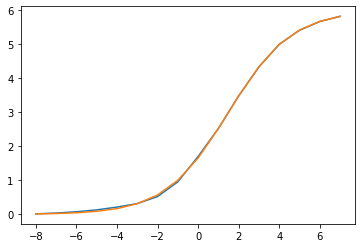

231
h = 6.265787482177985e-06
232
h = 5.639208733960187e-06
233
h = 5.075287860564168e-06
234
h = 4.5677590745077515e-06
235
h = 4.110983167056976e-06
236
(5.981869397654281, 2.611329123505867, 0.645378867132214) Error: 0.10616243152738823
237
h = 4.110983167056976e-06
238
h = 3.6998848503512788e-06
239
(5.981873097539131, 2.611329123505867, 0.645378867132214) Error: 0.10616243151002762
240
(5.981873097539131, 2.611333234489034, 0.645378867132214) Error: 0.10616243147397159


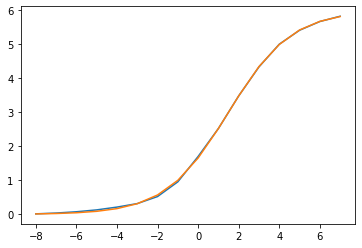

241
h = 4.110983167056976e-06
242
h = 3.6998848503512788e-06
243
h = 3.329896365316151e-06
244
h = 2.9969067287845362e-06
245
h = 2.6972160559060827e-06
246
(5.981873097539131, 2.6113305372729783, 0.645378867132214) Error: 0.10616243147331025
247
h = 2.6972160559060827e-06
248
(5.981873097539131, 2.6113305372729783, 0.6453761699161581) Error: 0.10616243145960469
249
(5.98187609444586, 2.6113305372729783, 0.6453761699161581) Error: 0.10616243086054426
250
(5.9818794243422255, 2.6113305372729783, 0.6453761699161581) Error: 0.10616243064392605


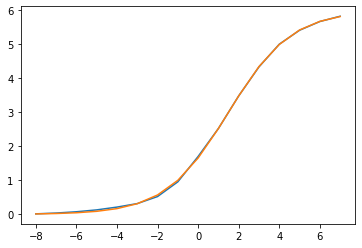

251
h = 3.329896365316151e-06
252
h = 2.9969067287845362e-06
253
h = 2.6972160559060827e-06
254
h = 2.4274944503154745e-06
255
h = 2.1847450052839273e-06
256
(5.9818794243422255, 2.611328352527973, 0.6453761699161581) Error: 0.10616243064344101
257
h = 2.1847450052839273e-06
258
h = 1.9662705047555346e-06
259
(5.9818794243422255, 2.6113303187984775, 0.6453761699161581) Error: 0.10616243064113823
260
h = 1.9662705047555346e-06


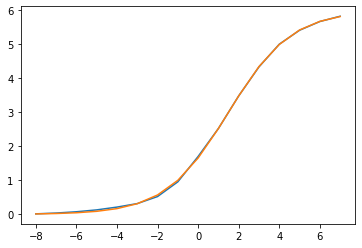

261
h = 1.7696434542799813e-06
262
(5.9818794243422255, 2.611328549155023, 0.6453761699161581) Error: 0.1061624306409917
263
h = 1.7696434542799813e-06
264
(5.9818776546987715, 2.611328549155023, 0.6453761699161581) Error: 0.10616243064076852
265
(5.9818776546987715, 2.6113265828845185, 0.6453761699161581) Error: 0.1061624306315754
266
h = 1.9662705047555346e-06
267
h = 1.7696434542799813e-06
268
h = 1.5926791088519833e-06
269
h = 1.433411197966785e-06
270
h = 1.2900700781701065e-06


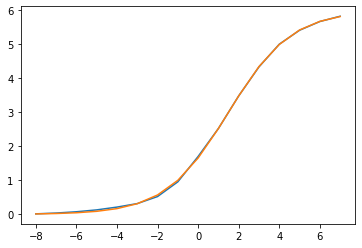

271
h = 1.161063070353096e-06
272
(5.9818776546987715, 2.6113277439475886, 0.6453761699161581) Error: 0.10616243063104168
273
h = 1.161063070353096e-06
274
h = 1.0449567633177863e-06
275
(5.981878699655534, 2.6113277439475886, 0.6453761699161581) Error: 0.10616243062854583
276
(5.981878699655534, 2.6113289050106587, 0.6453761699161581) Error: 0.10616243062572324
277
h = 1.161063070353096e-06
278
h = 1.0449567633177863e-06
279
h = 9.404610869860078e-07
280
h = 8.46414978287407e-07


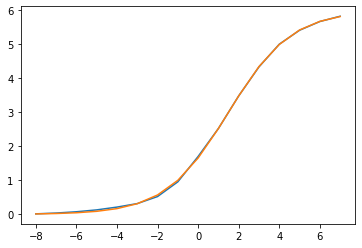

281
h = 7.617734804586663e-07
282
(5.981878699655534, 2.6113281432371784, 0.6453761699161581) Error: 0.10616243062563545
283
h = 7.617734804586663e-07
284
h = 6.855961324127997e-07
285
(5.981878699655534, 2.6113281432371784, 0.6453754843200257) Error: 0.10616243061788895
286
(5.981879461429015, 2.6113281432371784, 0.6453754843200257) Error: 0.10616243057947986
287
(5.981880307843993, 2.6113281432371784, 0.6453754843200257) Error: 0.10616243056581386
288
h = 8.46414978287407e-07
289
h = 7.617734804586663e-07
290
h = 6.855961324127997e-07


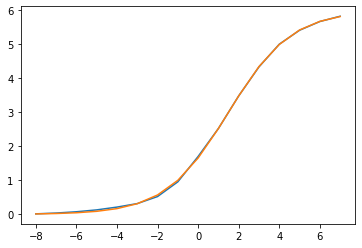

291
h = 6.170365191715197e-07
292
h = 5.553328672543678e-07
293
h = 4.99799580528931e-07
294
h = 4.498196224760379e-07
295
(5.981880307843993, 2.611327693417556, 0.6453754843200257) Error: 0.10616243056568048
296
h = 4.498196224760379e-07
297
h = 4.0483766022843414e-07
298
(5.981879903006333, 2.611327693417556, 0.6453754843200257) Error: 0.10616243056548265
299
(5.981879903006333, 2.6113272435979336, 0.6453754843200257) Error: 0.10616243056500564
300
h = 4.498196224760379e-07


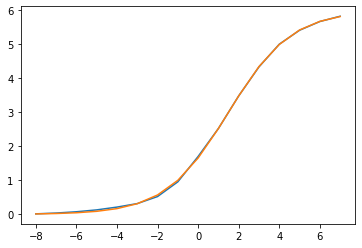

301
h = 4.0483766022843414e-07
302
h = 3.643538942055907e-07
303
h = 3.2791850478503163e-07
304
h = 2.951266543065285e-07
305
h = 2.6561398887587566e-07
306
(5.981879903006333, 2.6113275092119226, 0.6453754843200257) Error: 0.10616243056497525
307
h = 2.6561398887587566e-07
308
h = 2.390525899882881e-07
309
(5.981880142058923, 2.6113275092119226, 0.6453754843200257) Error: 0.1061624305649545
310
(5.981880142058923, 2.6113277748259116, 0.6453754843200257) Error: 0.10616243056480437


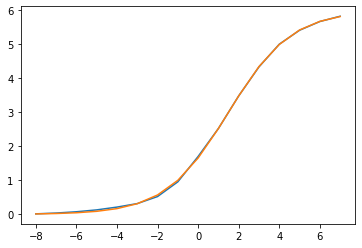

311
h = 2.6561398887587566e-07
312
h = 2.390525899882881e-07
313
h = 2.151473309894593e-07
314
h = 1.936325978905134e-07
315
h = 1.7426933810146205e-07
316
(5.981880142058923, 2.6113277748259116, 0.6453753100506876) Error: 0.10616243056424371
317
(5.981880335691521, 2.6113277748259116, 0.6453753100506876) Error: 0.10616243056124304
318
(5.981880550838852, 2.6113277748259116, 0.6453753100506876) Error: 0.10616243055978318
319
(5.981880550838852, 2.6113275357733214, 0.6453753100506876) Error: 0.10616243055939743
320
h = 2.390525899882881e-07


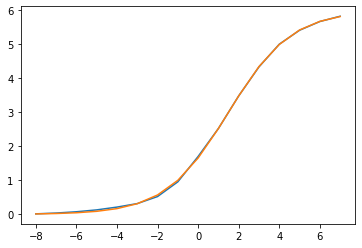

321
h = 2.151473309894593e-07
322
h = 1.936325978905134e-07
323
h = 1.7426933810146205e-07
324
h = 1.5684240429131584e-07
325
h = 1.4115816386218426e-07
326
h = 1.2704234747596583e-07
327
h = 1.1433811272836925e-07
328
h = 1.0290430145553233e-07
329
h = 9.26138713099791e-08
330


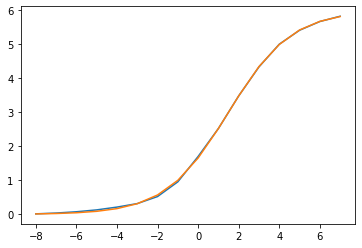

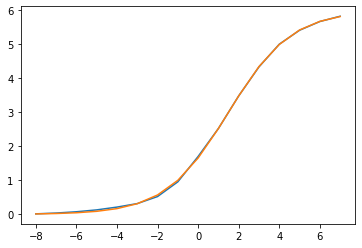

((5.981880550838852, 2.6113275357733214, 0.6453753100506876),
 0.10616243055939743)

In [49]:
#X = sorted([random.random() for i in range(100)])
#Y = list(f(x, [4, 5, 6]) for x in X)

X = list(range(-8, 8))

Y = [0.015210,
     0.038514,
     0.076349,
     0.131606,
     0.213302,
     0.316496,
     0.523442,
     0.956397,
     1.701699,
     2.524182,
     3.482633,
     4.335945,
     5.002156,
     5.412675,
     5.669212,
     5.824198]

findCurve(X, Y)